# 2019 Bay Wheels Ride Data Exploration and Visualization
## by Mohamed Elshebl

## Preliminary Wrangling

[Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2020 to August 2020 in CSV format covering the greater San Francisco Bay area, also available [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering and Assessing Data

In [2]:
# only ran once to append all monthly trip data together

folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)

C:\Users\mohamad.elshebl\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\mohamad.elshebl\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\mohamad.elshebl\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\mohamad.elshebl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future 

(2506983, 15)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2161719,10483,No,645,363.0,37.787492,-122.398285,Salesforce Transit Center (Natoma St at 2nd St),2019-10-02 07:34:22.3990,NaN,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2019-10-02 07:23:37.1550,Subscriber
92248,5340,No,690,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2019-01-19 21:44:24.2860,NaN,95.0,37.766219,-122.431060,Sanchez St at 15th St,2019-01-19 21:32:53.9320,Subscriber
1209094,2129,Yes,215,123.0,37.760594,-122.414817,Folsom St at 19th St,2019-06-06 08:22:15.8070,NaN,108.0,37.764710,-122.419957,16th St Mission BART,2019-06-06 08:18:40.7190,Subscriber
1172594,826,No,980,126.0,37.761634,-122.390648,Esprit Park,2019-06-11 19:16:31.8250,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-06-11 19:00:11.7240,Subscriber
1570845,10000,No,372,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-08-22 07:59:22.8000,NaN,66.0,37.778742,-122.392741,3rd St at Townsend St,2019-08-22 07:53:10.3560,Subscriber


In [3]:
# save the appended result to a .csv for further usage

result.to_csv('fordgobike_trips_2019.csv', index=False)

In [4]:
biketrips = pd.read_csv('fordgobike_trips_2019.csv')
biketrips.head()

C:\Users\mohamad.elshebl\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [5]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [6]:
biketrips.isnull().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [7]:
biketrips.duplicated().sum()

0

In [8]:
biketrips.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [9]:
biketrips.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

### Cleaning Data

In [10]:
# make a copy of the dataframe 
# issue 1: fix multiple fields that are not in the correct dtype

trips = biketrips.copy()
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

trips['start_station_id'] = trips['start_station_id'].astype('str')
trips['end_station_id'] = trips['end_station_id'].astype('str')
trips['bike_id'] = trips['bike_id'].astype('str')

trips['user_type'] = trips['user_type'].astype('category')
trips['rental_access_method'] = trips['rental_access_method'].astype('category')

trips.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    2506983 non-null object
bike_share_for_all_trip    2263724 non-null object
duration_sec               2506983 non-null int64
end_station_id             2506983 non-null object
end_station_latitude       2506983 non-null float64
end_station_longitude      2506983 non-null float64
end_station_name           2424633 non-null object
end_time                   2506983 non-null datetime64[ns]
rental_access_method       120838 non-null category
start_station_id           2506983 non-null object
start_station_latitude     2506983 non-null float64
start_station_longitude    2506983 non-null float64
start_station_name         2426850 non-null object
start_time                 2506983 non-null datetime64[ns]
user_type                  2506983 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 253.4+ MB


In [11]:
# issue 2: add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

trips['duration_minute'] = trips['duration_sec']/60

trips['start_date'] = trips.start_time.dt.strftime('%Y-%m-%d')
trips['start_hourofday'] = trips.start_time.dt.strftime('%H')
trips['start_dayofweek'] = trips.start_time.dt.strftime('%A')
trips['start_month'] = trips.start_time.dt.strftime('%B')

trips.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,1347.083333,2019-01-31,17,Thursday,January
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,1098.333333,2019-01-31,20,Thursday,January
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,1043.883333,2019-01-31,18,Thursday,January
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,744.666667,2019-01-31,19,Thursday,January
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,1011.816667,2019-01-31,14,Thursday,January


### What is the structure of your dataset?

The original combined data contains approximately 2,506,983 individual trip records with 15 variables collected. The variables can be divided into 3 major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`


- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- member info (anonymized): `bike_id`, `user_type`, `bike_share_for_all_trip` , `rental_access_method`

Derived features/variables to assist exploration and analysis:
- trip info: `duration_minute`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring the bike trips' duration and rental events occurrance patterns, along with how these relate to the riders' characteristics, i.e. their user type, rental access method, etc, to get a sense of how and what people are using the bike sharing service for. Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, rental access method will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

A series of plots to first explore the trips distribution over hour-of-day, day-of-week and month.

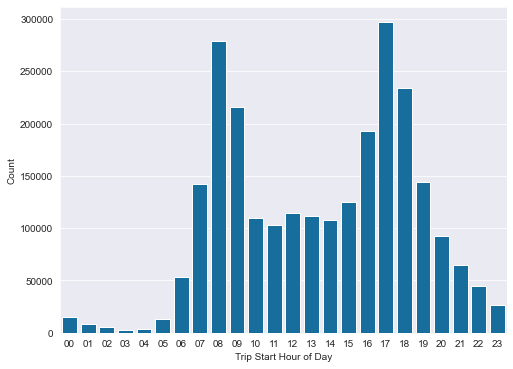

In [12]:
# trip distribution over day hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=trips, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

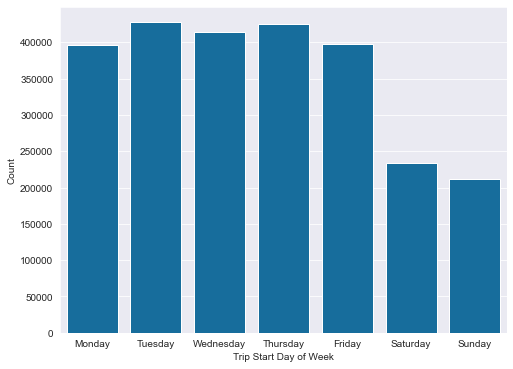

In [13]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips['start_dayofweek'] = trips['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=trips, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

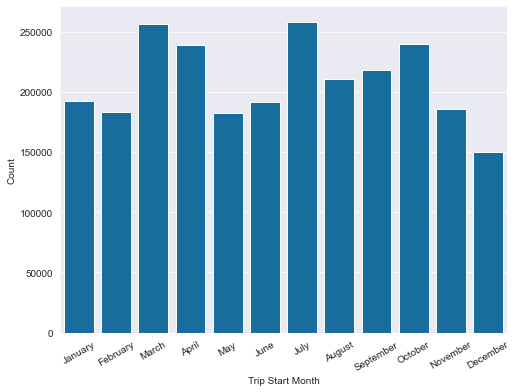

In [14]:
# trip distribution over months
# issue 7: cast 'start_month' to category dtype for easy plotting

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips['start_month'] = trips['start_month'].astype(monthcat)

sb.countplot(data=trips, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-19pm, during typical rush hours. Looking in combined with the trip distribution over day of week plot, it is quite obvious that the majority of rides happened on work days (Mon-Fri) and primary usage is probably for commuting. In the 12 months in 2019, july and march had the most ride trips compared to the others, but overall it was the most popular during spring & summer time (may-oct), probably due to the weather in the area.   

The next several plots are around members/users to see what makes up of the riders.

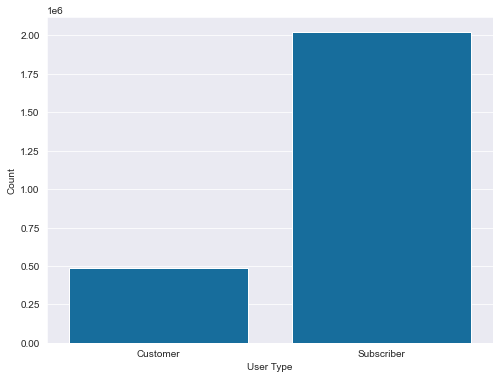

In [15]:
sb.countplot(data=trips, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

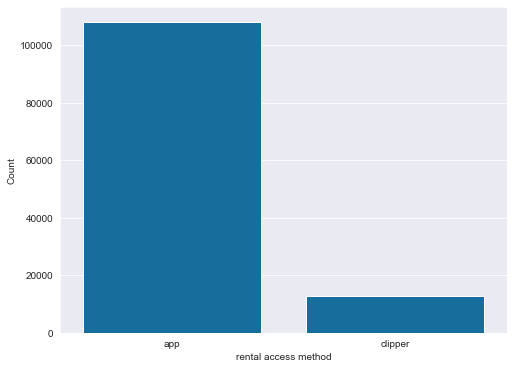

In [16]:
sb.countplot(data=trips, x='rental_access_method', color=base_color);
plt.xlabel('rental access method');
plt.ylabel('Count');

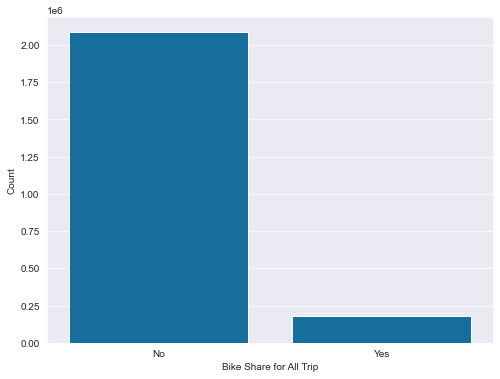

In [17]:
sb.countplot(data=trips, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

Most riders were app users and subscribers who did not use bike share for all trips. corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. 

Trip duration distribution to plot next. 

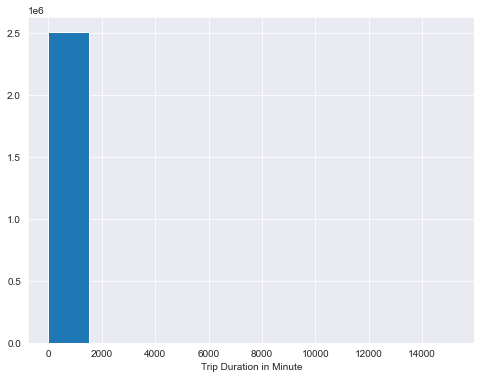

In [18]:
plt.hist(data=trips, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 200 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.   

In [19]:
trips['duration_minute'].describe(percentiles=[.99])

count    2.506983e+06
mean     1.346081e+01
std      3.291190e+01
min      1.000000e+00
50%      9.516667e+00
99%      6.876667e+01
max      1.520183e+04
Name: duration_minute, dtype: float64

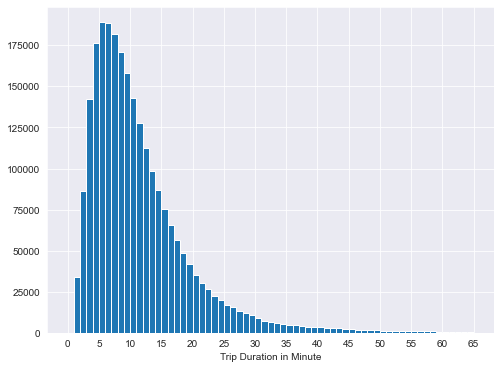

In [20]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=trips, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It looks like 99% of the trips were less than 30 Min. long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.

In [21]:
# issue 8: filter out outlier trip records where the duration was very long

trips = trips.query('duration_minute <= 30')
trips.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2388425 entries, 6 to 2506981
Data columns (total 20 columns):
bike_id                    2388425 non-null object
bike_share_for_all_trip    2158152 non-null object
duration_sec               2388425 non-null int64
end_station_id             2388425 non-null object
end_station_latitude       2388425 non-null float64
end_station_longitude      2388425 non-null float64
end_station_name           2312703 non-null object
end_time                   2388425 non-null datetime64[ns]
rental_access_method       112621 non-null category
start_station_id           2388425 non-null object
start_station_latitude     2388425 non-null float64
start_station_longitude    2388425 non-null float64
start_station_name         2314409 non-null object
start_time                 2388425 non-null datetime64[ns]
user_type                  2388425 non-null category
duration_minute            2388425 non-null float64
start_date                 2388425 non-null obje

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The number of trips peaked around 8-9am and 17-10pm during a day, there were more trips on work days (Mon-Fri) compared to weekends. spring and Summar time was the most popular season of a year, likely due to the weather. 

User-wise, most members were subscribers compared to casual riders. The majority of the members did not use bike share for all of their trips, and most were  app users  

Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers like 24hrs.

No transformation was needed luckily due to the straightforwardness of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query(). 

In [22]:
# save the clean data to a .csv file

trips.to_csv('fordgobike_trips_2019_clean.csv', index=False)

## Bivariate Exploration

How does the trip duration distribution vary between customers and subscribers?

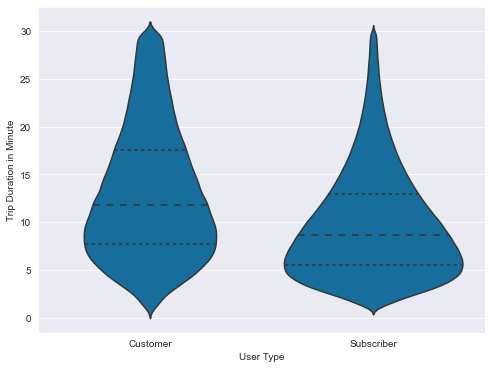

In [23]:
sb.violinplot(data=trips, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.   

How does the trip duration distribution vary by rental access method?

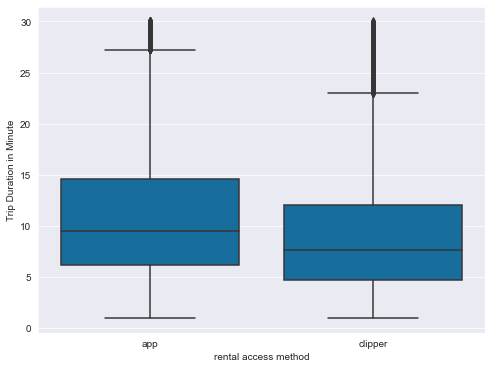

In [24]:
sb.boxplot(data=trips, x='rental_access_method', y='duration_minute', color=base_color);
plt.xlabel('rental access method');
plt.ylabel('Trip Duration in Minute');

Though not a huge difference, dipper users tend to have shorter trips compared to app users, indicated by both a smaller median and shorter IQR.  

Average Trip Duration on Weekdays

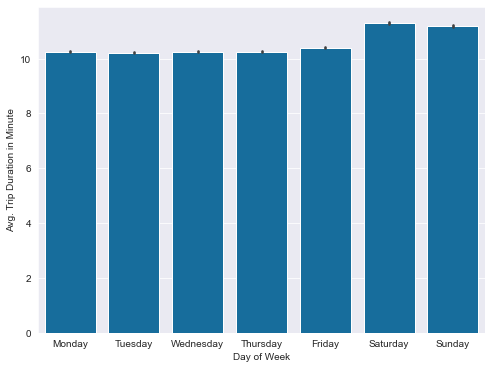

In [25]:
sb.barplot(data=trips, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends. 

Average trip duration by month

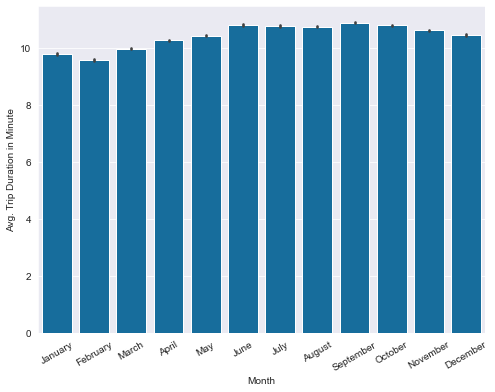

In [26]:
sb.barplot(data=trips, x='start_month', y='duration_minute', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Minute');

Starting from March, the average usage time shown an increasing trend almost all the way til October before it down turned. The average longest trips happened during the summer months, around June, July and September, which probably has a lot to do with the weather in the area.

Weekly usage between customers and subscribers

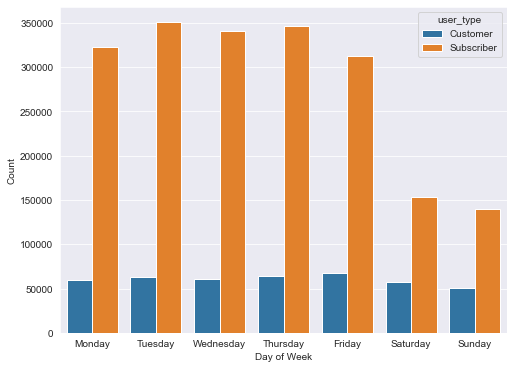

In [27]:
sb.countplot(data=trips, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

There was much more subscriber usage than casual customers overall. The drop of volume on weekends for subscribers indicates that they primarily ride bikes for work commute during work days, whereas almost same pattern of use for customers all over the week  

Daily usage between customers and subscribers

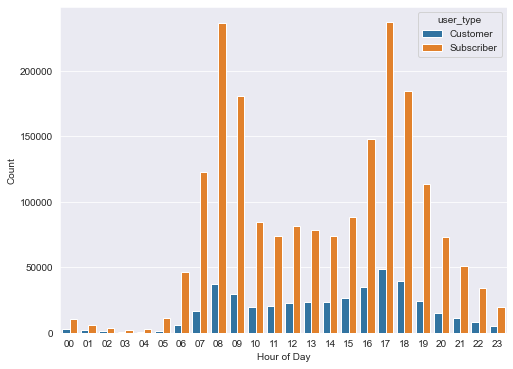

In [28]:
sb.countplot(data=trips, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was observed among customers

Yearly usage between customers and subscribers

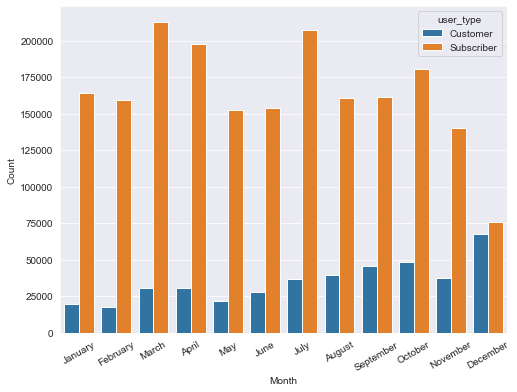

In [29]:
sb.countplot(data=trips, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

Both subscribers and customers ride the most during the spring andsummer months with subscribers maxed out in March and july and customers peaked in December. The usage was clearly not popular during winter season start like November, December for subscribers but it reachs the peak for customers in December with a small differance compared with subscribers it seems due to xmas holiyday and tourists visits 



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. The riding habit/pattern varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers has noraml pattern thru the week .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

December is the peak for customers and it may be due to tourists visits in Xmas holyiday 

## Multivariate Exploration

How does the average trip duration vary in weekdays between customers and subscribers?

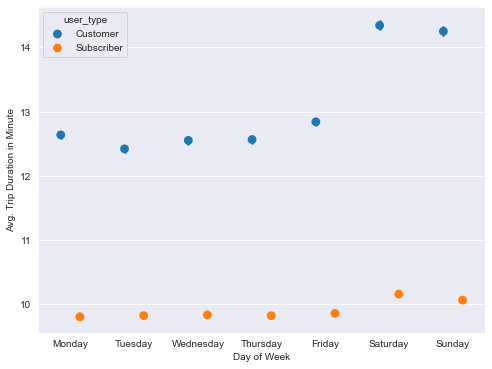

In [30]:
sb.pointplot(data=trips, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.     

How does the hourly usage vary during weekdays for customers and subscribers?

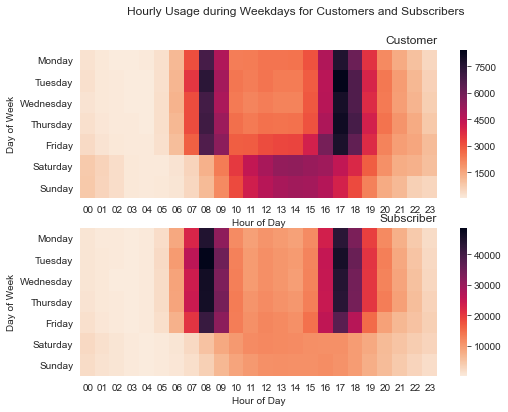

In [31]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = trips.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = trips.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows clearly very different usage pattern/habit between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-19pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.        

### Is there any missed data that will help to have more finding and give a clear overview?

If we have customer gender , age it will help to investagte the behavior of users based on age and gender.    

## Thanks Mohamed Elshebl